### K-means

In [60]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt


blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8], [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

k = 5 
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

In [61]:
y_pred

array([0, 0, 4, ..., 3, 1, 0], dtype=int32)

In [62]:
y_pred is kmeans.labels_


True

In [63]:
kmeans.cluster_centers_

array([[-2.80214068,  1.55162671],
       [ 0.08703534,  2.58438091],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.31332823,  1.96822352]])

In [64]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([4, 4, 3, 3], dtype=int32)

In [65]:
kmeans.transform(X_new).round(2)

array([[2.84, 0.59, 1.5 , 2.9 , 0.31],
       [5.82, 2.97, 4.48, 5.85, 2.69],
       [1.46, 3.11, 1.69, 0.29, 3.47],
       [0.97, 3.09, 1.55, 0.36, 3.36]])

#### Centroid initialization methods

In [66]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

In [67]:
kmeans.inertia_

211.59853725816836

In [68]:
kmeans.score(X)

-211.5985372581684

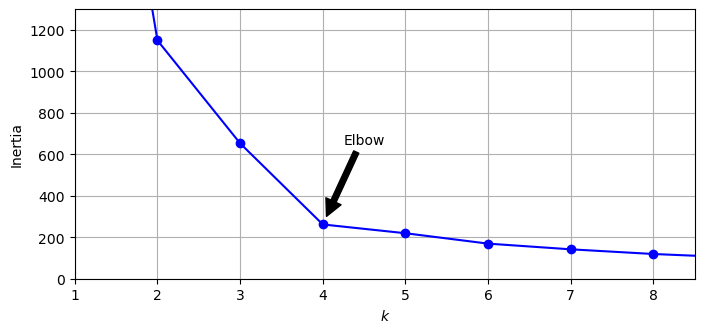

In [69]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
plt.savefig("inertia_vs_k_plot")
plt.show()

#### Accelerated k-means and mini-batch k-means

In [70]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

#### Finding the optimal number of clusters

In [71]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)


0.6555176425728279

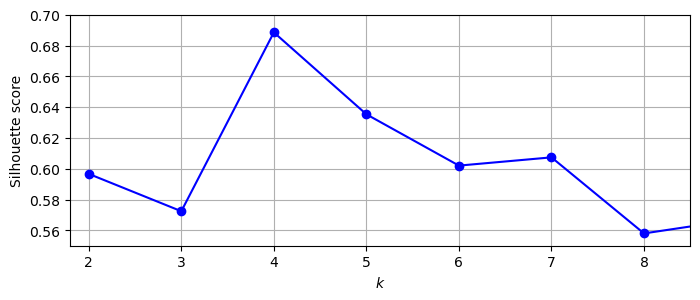

In [72]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()
plt.savefig("silhouette_score_vs_k_plot")
plt.show()

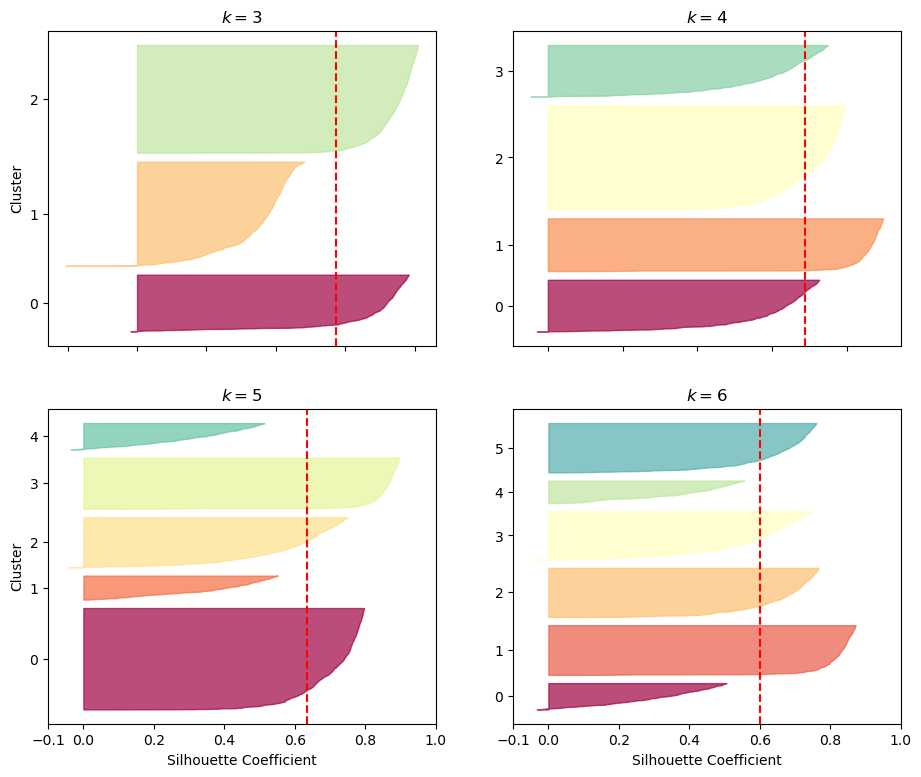

In [73]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter


plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.savefig("silhouette_analysis_plot")
plt.show()

#### Using Clustering for Image Segmentation

In [74]:
import urllib.request
from pathlib import Path

IMAGES_PATH = Path("/Users/meda/Desktop/projects/ML/ch9. Unsupervised Learning")  # Update this path as needed

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [75]:
import PIL
image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

In [76]:
X = image.reshape(-1, 3)


##### Color Segmentation

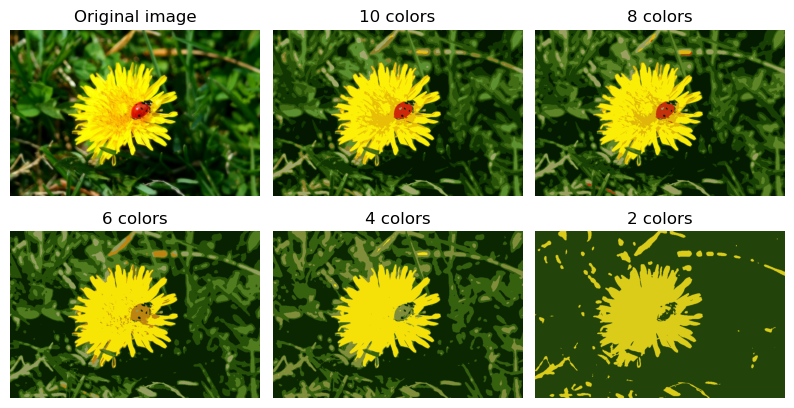

In [77]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis('off')

plt.savefig('image_segmentation_plot')
plt.show()

#### Using Clustering for Semi-supervised Learning

In [78]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = X_digits[:1400], X_digits[1400:], y_digits[:1400], y_digits[1400:]

In [79]:
from sklearn.linear_model import LogisticRegression
n_labeled = 50
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])   

LogisticRegression(max_iter=10000)

In [80]:
log_reg.score(X_test, y_test)

0.7581863979848866

In [81]:
k= 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

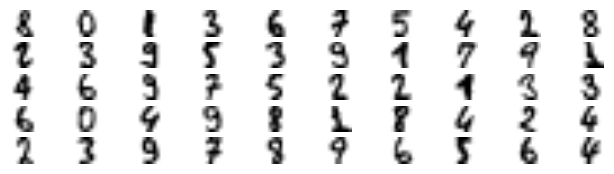

In [82]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

plt.savefig("representative_images_plot")
plt.show()

In [83]:
y_representative_digits = np.array([
    8, 0, 1, 3, 6, 7, 5, 4, 2, 8,
    2, 3, 9, 5, 3, 9, 1, 7, 9, 1,
    4, 6, 9, 7, 5, 2, 2, 1, 3, 3,
    6, 0, 4, 9, 8, 1, 8, 4, 2, 4,
    2, 3, 9, 7, 8, 9, 6, 5, 6, 4
])

In [84]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8312342569269522

In [85]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [86]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8690176322418136

In [87]:
percentile_closest = 99
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist,
    percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]


In [88]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8589420654911839

In [89]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

0.9607407407407408

#### DBSCAN

In [90]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.2)

In [91]:
dbscan.labels_

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,

In [92]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [93]:
dbscan.components_

array([[ 1.61327608, -0.34419115],
       [ 1.44598289, -0.3317215 ],
       [ 0.04998248,  0.18741148],
       ...,
       [ 0.33301739,  0.85943328],
       [-0.8612802 ,  0.58933872],
       [ 0.79973912,  0.67243466]])

In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [95]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [96]:
knn.predict_proba(X_new)

array([[0.14, 0.86],
       [1.  , 0.  ],
       [0.18, 0.82],
       [1.  , 0.  ]])

In [97]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

#### Gaussian Mixtures

In [98]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [99]:
gm.weights_

array([0.20090118, 0.2068572 , 0.59224162])

In [100]:
gm.means_

array([[ 1.75303353, -0.04943663],
       [-0.7389308 ,  0.56193307],
       [ 0.51087299,  0.24269372]])

In [101]:
gm.covariances_

array([[[ 0.04984008,  0.06010829],
        [ 0.06010829,  0.08662311]],

       [[ 0.05595021,  0.0646146 ],
        [ 0.0646146 ,  0.08977767]],

       [[ 0.17230139, -0.10267714],
        [-0.10267714,  0.28932515]]])

In [102]:
gm.converged_

True

In [103]:
gm.n_iter_

18

In [104]:
gm.predict(X)

array([0, 0, 2, 1, 2, 2, 0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2,
       2, 2, 0, 0, 0, 2, 2, 2, 1, 1, 2, 0, 2, 0, 1, 2, 0, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 2, 2,
       1, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 2, 0, 2,
       0, 2, 2, 1, 1, 0, 2, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 2,
       2, 2, 0, 1, 0, 1, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 1, 2, 0, 2,
       1, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0,

In [105]:
gm.predict_proba(X).round(3)

array([[0.976, 0.   , 0.024],
       [0.904, 0.   , 0.096],
       [0.   , 0.   , 1.   ],
       ...,
       [0.   , 0.   , 1.   ],
       [0.   , 0.997, 0.003],
       [0.   , 0.   , 1.   ]])

In [106]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.24164452,  1.13664929],
       [-1.28564688, -0.05593216],
       [ 0.21968856,  0.26279803],
       [ 0.26587093,  0.19074671],
       [ 0.62868575, -0.04662808],
       [-0.12560418,  2.00401579]])

In [107]:
y_new

array([1, 1, 2, 2, 2, 2])

In [109]:
gm.score_samples(X).round(2)

array([-0.55, -0.93, -1.6 , -0.34, -1.91, -1.64, -1.33,  0.12, -0.11,
       -1.2 , -3.25, -1.07, -1.5 , -2.28, -1.63, -0.34, -1.45, -2.02,
       -0.15, -1.64, -1.75, -1.59, -1.89, -1.63,  0.09, -1.51, -1.28,
       -1.62, -1.39, -1.72, -1.42, -0.67, -1.68, -0.97, -1.86, -0.67,
       -0.9 , -2.2 , -1.67, -1.66, -1.5 , -0.33, -2.04, -2.05, -0.41,
       -2.03, -1.73, -2.23, -1.15, -1.73, -2.03, -1.57, -1.59, -0.14,
       -2.25, -1.59, -0.29, -0.88, -0.26, -1.67, -0.05, -0.52, -1.67,
       -0.83, -2.21, -0.17, -2.08, -1.91, -2.12, -1.37, -1.63, -2.13,
       -1.73, -1.69, -1.79, -1.51, -1.39, -1.57, -0.55, -1.31, -2.24,
       -1.33, -1.64, -0.39, -2.26, -1.97, -1.71,  0.08,  0.1 , -1.58,
       -1.72, -1.72, -1.27, -1.47, -1.62, -2.03, -1.84, -1.6 , -1.28,
       -1.44, -1.35, -1.6 , -0.31, -1.09, -1.58, -1.67, -1.68, -1.42,
       -1.53, -1.82, -2.  , -1.48, -1.18, -1.85, -1.69, -0.83, -0.51,
       -1.91, -2.14, -0.94, -2.16, -1.53, -1.66, -1.69, -1.66, -1.48,
       -1.75, -1.42,

### Using Gaussian Mixtures for Anomaly detection

In [111]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 2)
anomalies = X[densities < density_threshold]
anomalies

array([[ 1.93165752,  0.4628781 ],
       [ 1.25177253, -0.42799885],
       [ 1.89016592,  0.37370687],
       [-0.94577502,  0.07337663],
       [ 1.88152018, -0.16468261],
       [-1.00219007, -0.08373986],
       [ 2.08010818,  0.54478771],
       [ 1.93868486,  0.44709506],
       [ 1.99149483,  0.54397767],
       [ 1.27986282, -0.38927016],
       [-0.96693768,  0.03613037],
       [-1.01310985, -0.0142405 ],
       [-0.93376568,  0.07319763],
       [ 1.92335918,  0.49506549],
       [ 1.84462915, -0.20252479],
       [-1.00922806, -0.01192578],
       [-0.93244346,  0.08575708],
       [-1.01434176, -0.05370029],
       [ 1.26925599, -0.40982196],
       [ 1.23402576, -0.44147678]])

In [112]:
gm.bic(X)

2743.5777644154755

In [113]:
gm.aic(X)

2660.145924672779

#### Bayesian GMMs

In [114]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
bgm.weights_.round(2)

array([0.17, 0.11, 0.16, 0.11, 0.12, 0.11, 0.11, 0.11, 0.  , 0.  ])